In [113]:
# importing the required libraries
import pandas as pd
import numpy as np

# disabling warnings
import warnings
warnings.filterwarnings('ignore')

In [114]:
# reading data from the csv file
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [115]:
# dropping column of customer id
data = data.drop(['CustomerID'], axis = 1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [116]:
# converting Gender to Binary

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Task 1

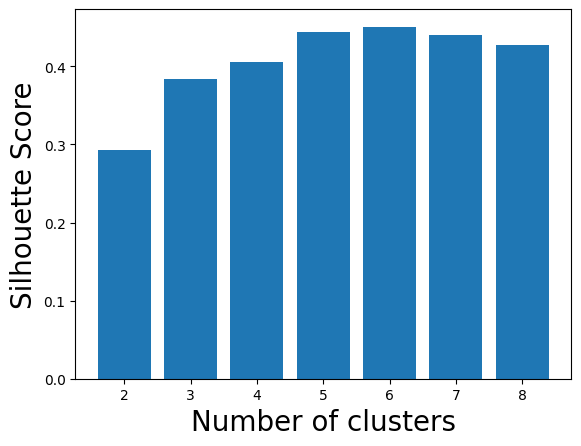

In [117]:
# Find the optimum number of clusters using silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# creating a list of number of clusters
n_clusters = [2, 3, 4, 5, 6, 7, 8]

# creating a list of silhouette scores
silhouette_scores = []

# iterating over the number of clusters
for n in n_clusters:
    # creating an instance of kmeans clustering
    kmeans = KMeans(n_clusters = n)
    
    # fitting the model on the data
    kmeans.fit(data)
    
    # calculating the silhouette score
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# plotting a bar graph to compare the results
plt.bar(n_clusters, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Silhouette Score', fontsize = 20)
plt.show()

According to Silhouette Score, the optimal number of clusters is 6

## Task 2

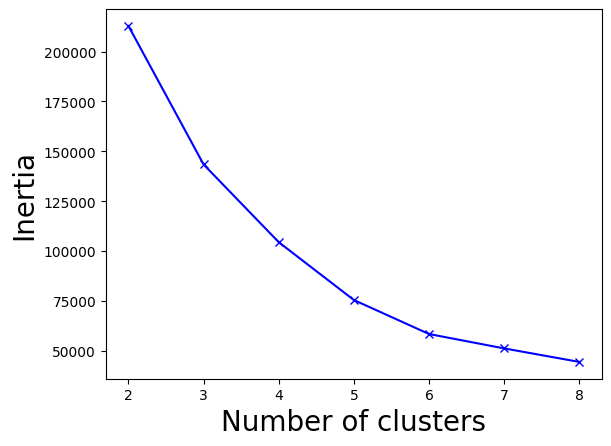

In [118]:
# Find the optimum number of clusters using elbow method

# creating a list of number of clusters
n_clusters = [2, 3, 4, 5, 6, 7, 8]

# creating a list of inertia values
inertia_values = []

# iterating over the number of clusters
for n in n_clusters:
    # creating an instance of kmeans clustering
    kmeans = KMeans(n_clusters = n)
    
    # fitting the model on the data
    kmeans.fit(data)
    
    # appending the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# plotting a line graph to compare the results
plt.plot(n_clusters, inertia_values, 'bx-')
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Inertia', fontsize = 20)
plt.show()

According to Elbow Method, the optimal number of clusters is 6

## Task 3

In [119]:
# Using the variables “Annual Income” and “Spending Score

subset = data[['Annual Income (k$)', 'Spending Score (1-100)']]
subset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [120]:
# Implement Hierarchical clustering (Agglomerative) FROM SCRATCH

n_clusters = 6

# initializing the centroids
centroids = subset.sample(n_clusters)
centroids

,Annual Income (k$),Spending Score (1-100)
124,70,29
48,40,42
141,75,93
167,86,95
157,78,78
88,58,60


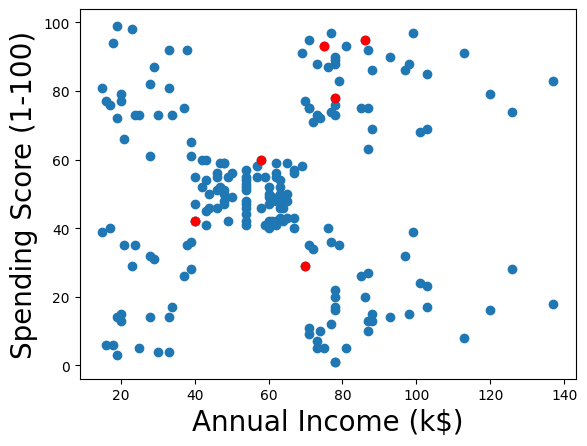

In [121]:
# plotting the data points and centroids
plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'])
plt.scatter(centroids['Annual Income (k$)'], centroids['Spending Score (1-100)'], color = 'red')
plt.xlabel('Annual Income (k$)', fontsize = 20)
plt.ylabel('Spending Score (1-100)', fontsize = 20)
plt.show()

In [122]:
# creating a function to assign clusters to the data points
def assign_clusters(data, centroids):
    # initializing an empty list of clusters
    clusters = []
    
    # iterating over the data points
    for i in range(len(data)):
        # initializing an empty list of distances
        distances = []
        
        # iterating over the centroids
        for j in range(len(centroids)):
            # calculating the distance between the data point and centroid
            distance = np.sqrt(np.sum((data.iloc[i] - centroids.iloc[j]) ** 2))
            
            # appending the distance to the list of distances
            distances.append(distance)
        
        # appending the cluster with the minimum distance to the list of clusters
        clusters.append(np.argmin(distances))
    
    # returning the list of clusters
    return clusters

# assigning clusters to the data points
clusters = assign_clusters(subset, centroids)
clusters[:10]
subset['clusters'] = clusters

In [123]:
# function to update the centroids
def update_centroids(data, centroids):
    return data.groupby('clusters').mean()

# updating the centroids
centroids = update_centroids(subset, subset)

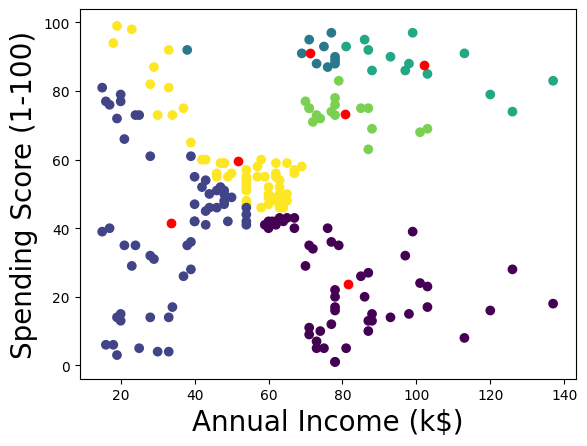

In [124]:
# function to plot the clusters
def plot_clusters(data, centroids):
    # plotting the data points and centroids
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = data['clusters'])
    plt.scatter(centroids['Annual Income (k$)'], centroids['Spending Score (1-100)'], color = 'red')
    plt.xlabel('Annual Income (k$)', fontsize = 20)
    plt.ylabel('Spending Score (1-100)', fontsize = 20)
    plt.show()

# plotting the clusters
plot_clusters(subset, centroids)

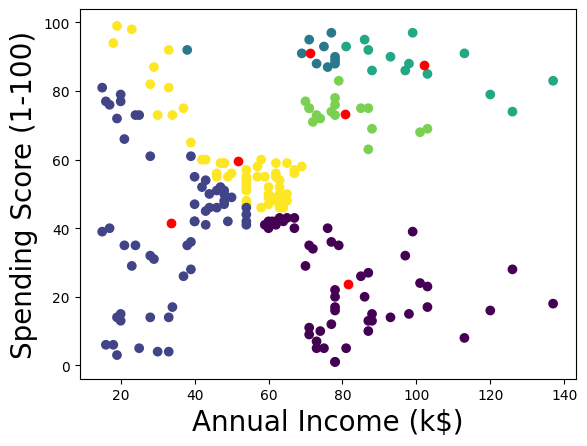

In [125]:
# iterating till convergence
while True:
    # assigning clusters to the data points
    clusters = assign_clusters(subset, centroids)
    
    # storing the old centroids
    old_centroids = centroids
    
    # updating the centroids
    centroids = update_centroids(subset, subset)
    
    # checking for convergence
    if old_centroids.equals(centroids):
        break

# plotting the clusters
plot_clusters(subset, centroids)

# Task 4

In [126]:
# implementing hierarchical clustering using sklearn, single, complete, average

from sklearn.cluster import AgglomerativeClustering

In [137]:
import scipy.cluster.hierarchy as sch

# function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    # creating a figure
    plt.figure(figsize = (20, 10))
    
    # creating a dendrogram
    sch.dendrogram(sch.linkage(subset, method = 'single'))

### Single

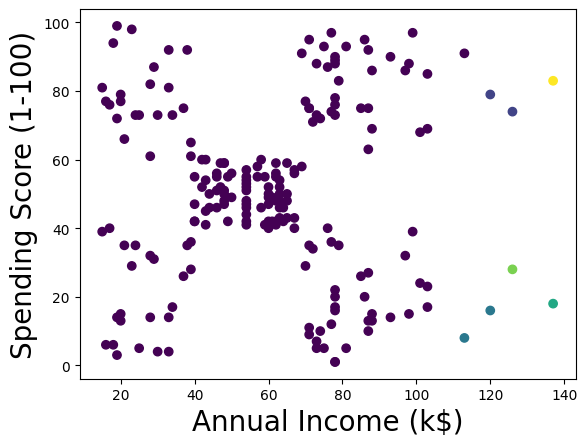

In [127]:
# creating an instance of agglomerative clustering
model = AgglomerativeClustering(n_clusters = 6, linkage = 'single')

# fitting the model on the data
model.fit(subset)

# plotting the clusters
plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'], c = model.labels_)
plt.xlabel('Annual Income (k$)', fontsize = 20)
plt.ylabel('Spending Score (1-100)', fontsize = 20)
plt.show()

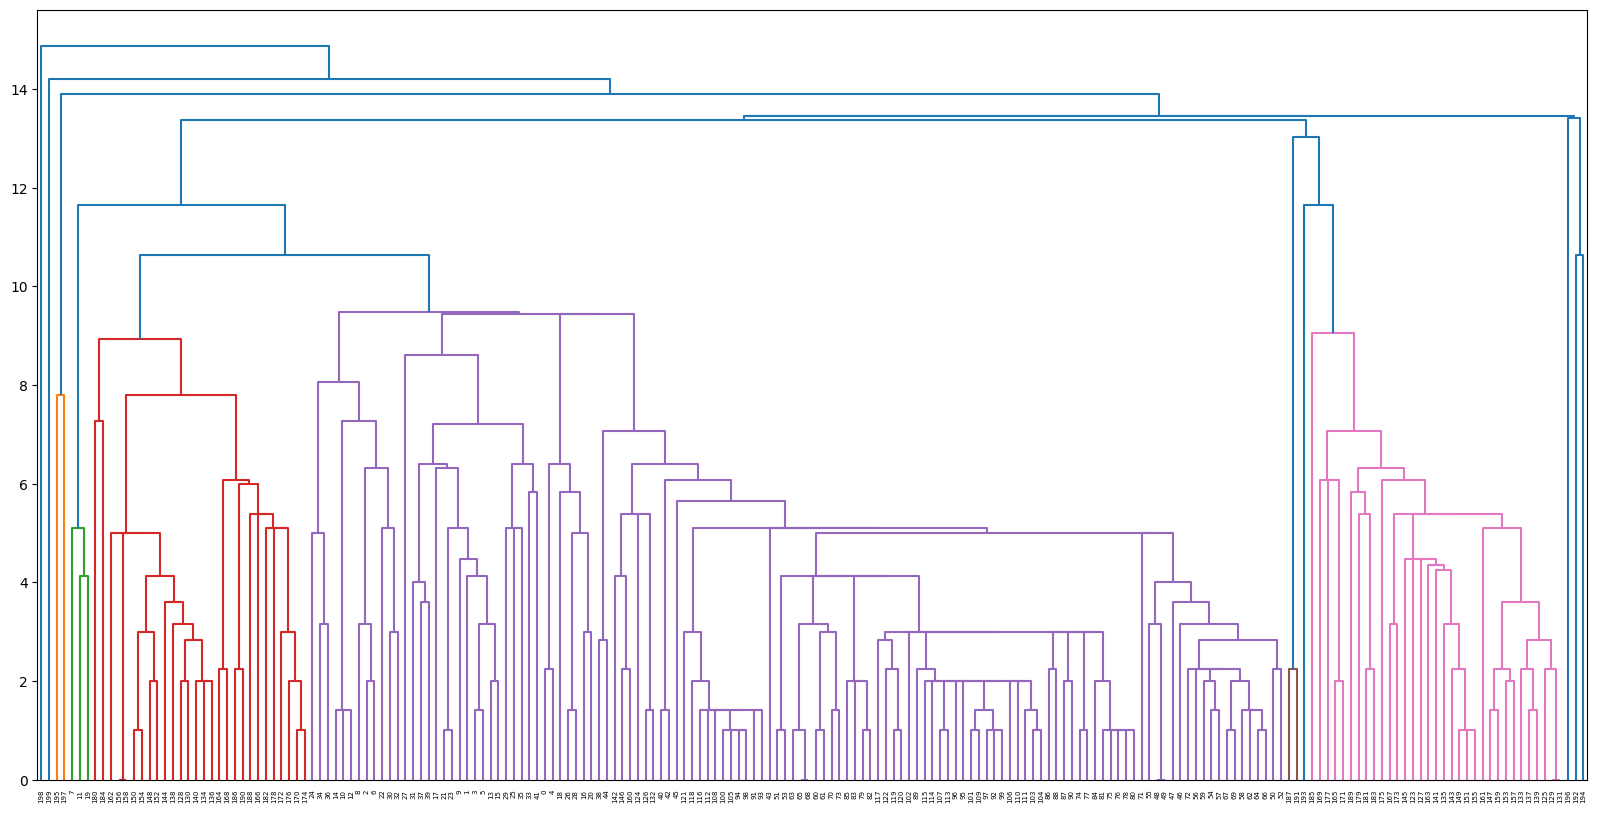

In [138]:
# plotting the dendrogram
plot_dendrogram(model)

### Complete

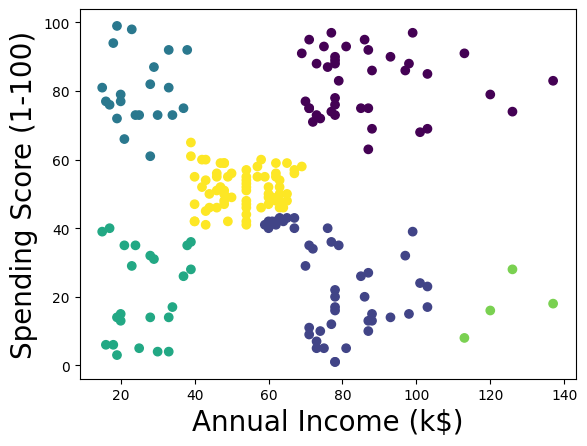

In [128]:
# creating an instance of agglomerative clustering
model = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')

# fitting the model on the data
model.fit(subset)

# plotting the clusters
plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'], c = model.labels_)
plt.xlabel('Annual Income (k$)', fontsize = 20)
plt.ylabel('Spending Score (1-100)', fontsize = 20)
plt.show()

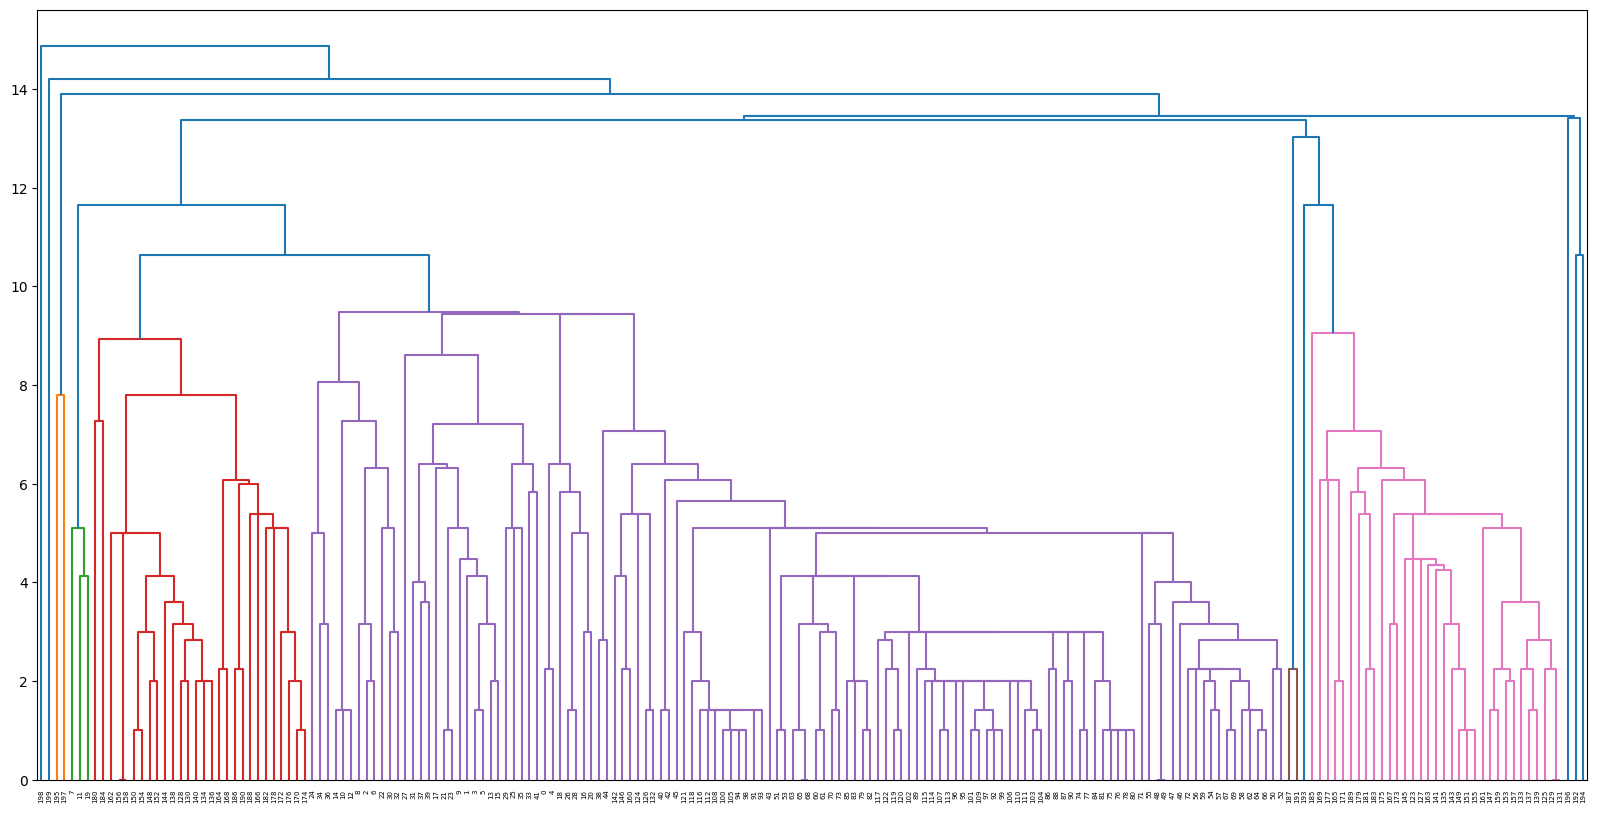

In [139]:
# plotting the dendrogram
plot_dendrogram(model)

### Average

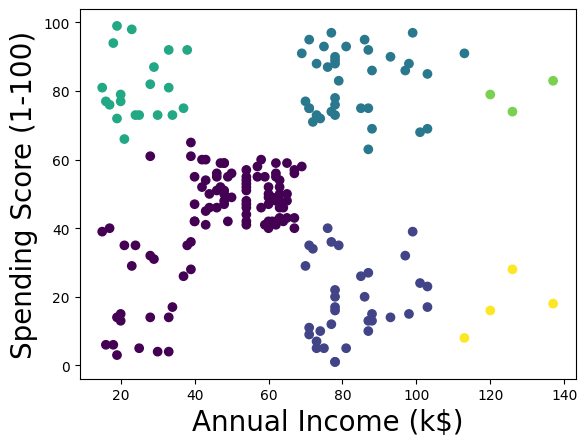

In [129]:
# creating an instance of agglomerative clustering
model = AgglomerativeClustering(n_clusters = 6, linkage = 'average')

# fitting the model on the data
model.fit(subset)

# plotting the clusters
plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'], c = model.labels_)
plt.xlabel('Annual Income (k$)', fontsize = 20)
plt.ylabel('Spending Score (1-100)', fontsize = 20)
plt.show()

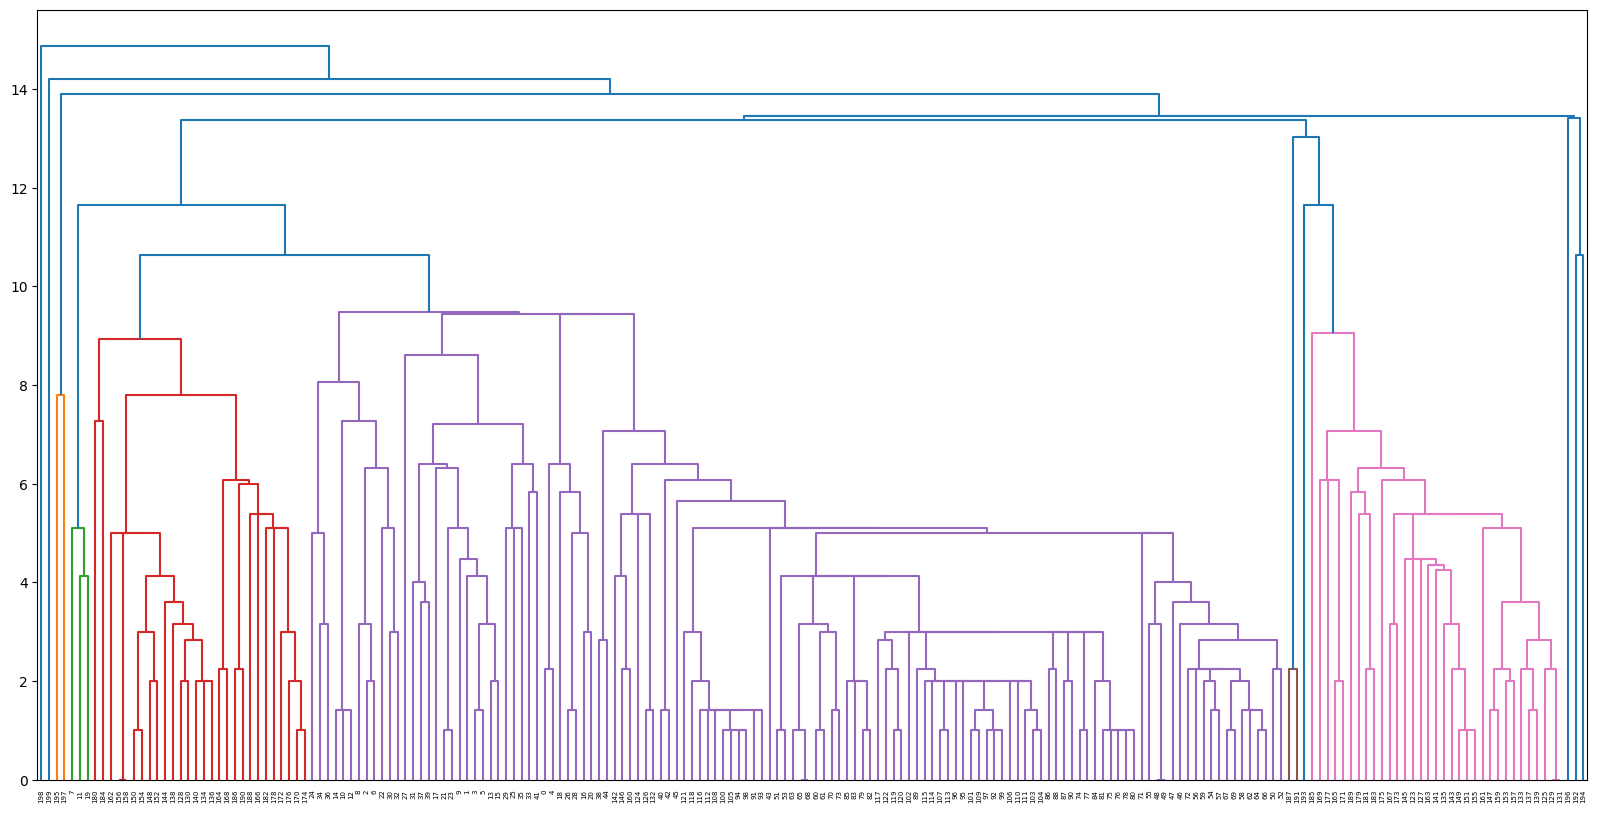

In [140]:
# plotting the dendrogram
plot_dendrogram(model)